In [1]:
import numpy as np
import cv2 as cv2
from PIL import Image


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

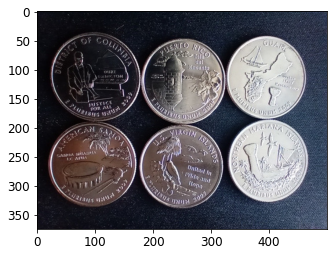

In [2]:
image=Image.open('monedas.jpg')
plt.imshow(image)

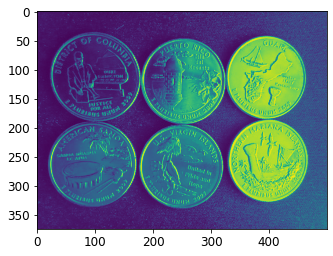

In [4]:
image = cv2.imread('monedas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)

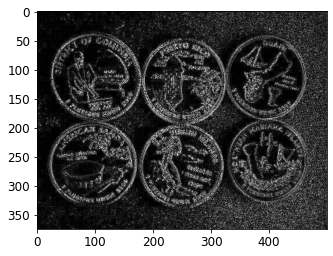

In [5]:
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.imshow(fixColor(lap))

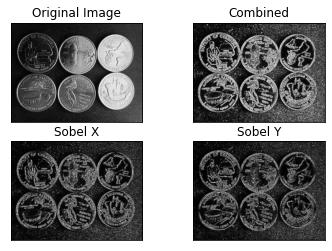

In [6]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
titles = ['Original Image', 'Combined',
            'Sobel X', 'Sobel Y']
images = [image, sobelCombined, sobelX, sobelY]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

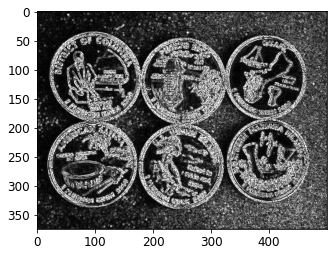

In [7]:
plt.imshow(fixColor(sobelCombined))

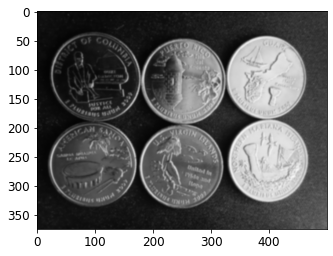

In [9]:
image = cv2.imread('monedas.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(fixColor(blurred))

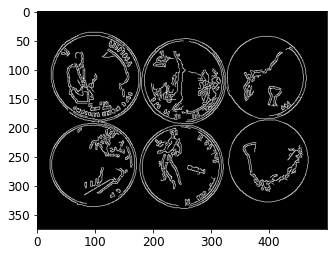

In [10]:
canny = cv2.Canny(blurred, 30, 300)
plt.imshow(fixColor(canny))

In [19]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [20]:
coins = image.copy()

In [21]:
cv2.drawContours(coins, cnts, -1, (255, 0, 0), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

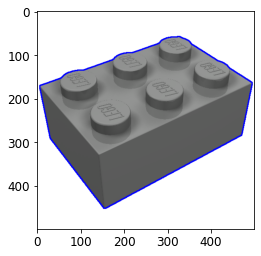

In [22]:
plt.imshow(fixColor(coins))

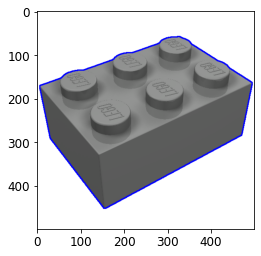

In [23]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(fixColor(coins))

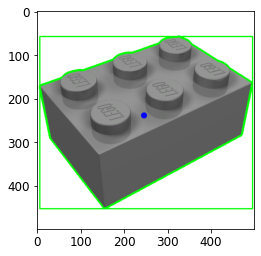

In [29]:
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # draw the center of the shape on the image
    cv2.circle(image, (cX, cY), 7, (0, 0, 255), -1)

    # show the image
    plt.imshow(image, cmap='gray')
    plt.show()

# for c in cnts:
#     cv2.drawContours(image,[c],-1,(0,255,0),3)
    
#     # compute the center of the contour
#     M = cv2.moments(c)
#     if M["m00"] != 0:
#      cX = int(M["m10"] / M["m00"])
#      cY = int(M["m01"] / M["m00"])
#      print(cX)
#      print(cY)
#     else:
#      cX, cY = 0, 0
#     cv2.circle(image, (cX, cY), 1, (0, 0, 0), 1)

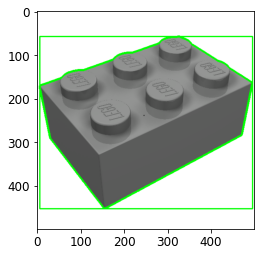

In [26]:
plt.imshow(image)


In [59]:
image[cY,cX]

array([ 78,  71, 116], dtype=uint8)